# mount your google drive in colab

In [1]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/MyDrive

Mounted at /gdrive
/gdrive/MyDrive


# Download [requirment files](https://drive.google.com/file/d/1KXhBxmKGjrZN_FJrX2YYXmT-ONPPlYC5/view) to your google driver

* open link and save compressed file to your google drive (click **add to drive** on right corner of the page)
* choose your data path
* default data path is /gdrive/MyDrive/mri

In [2]:
!mkdir -p /gdrive/MyDrive/mri

data_path = '/gdrive/MyDrive/mri'

!7z x Ex04_fMRI_requirement.7z -o/gdrive/MyDrive/mri


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 507079453 bytes (484 MiB)

Extracting archive: Ex04_fMRI_requirement.7z
--
Path = Ex04_fMRI_requirement.7z
Type = 7z
Physical Size = 507079453
Headers Size = 558
Method = LZMA2:24
Solid = +
Blocks = 1

  0%    
Would you like to replace the existing file:
  Path:     /gdrive/MyDrive/mri/ANTs-28-03-2019.7z
  Size:     315597527 bytes (301 MiB)
  Modified: 2022-05-04 13:36:04
with the file from archive:
  Path:     ANTs-28-03-2019.7z
  Size:     315597527 bytes (301 MiB)
  Modified: 2022-05-04 13:36:04
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? S

  0% . ANTs-28-03-2019.7z                          26% . ANTs-28-03-2019.7z

# Extract and add pre-build [ANTs](https://github.com/ANTsX/ANTs) (Advanced Normalization Tools) to enviroment

## Caution : **Don't change "ANTs_PATH"**


In [7]:
import os

%cd /gdrive/MyDrive/mri

ANTs_PATH = '/gdrive/MyDrive/ANTs'

!mkdir -p $ANTs_PATH


!7z x ANTs-28-03-2019.7z -o/gdrive/MyDrive/ANTs -y
os.environ['PATH'] += f":{ANTs_PATH}/bin"
!chmod +x $ANTs/bin*

/gdrive/MyDrive/mri

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 315597527 bytes (301 MiB)

Extracting archive: ANTs-28-03-2019.7z
--
Path = ANTs-28-03-2019.7z
Type = 7z
Physical Size = 315597527
Headers Size = 2380
Method = LZMA2:24 BCJ
Solid = +
Blocks = 1

  0%      0% 1 - bin/ANTS                   1% 1 - bin/ANTS                   1% 2 - bin/ANTSIntegrateVectorField                                       2% 3 - bin/ANTSIntegrateVelocityField                                         3% 3 - bin/ANTSIntegrateVelocityField

### check ANTs works or not.
### if it works you sould see something like this line :
### *Usage: ResampleImage imageDimension inputImage outputImage MxNxO*


In [8]:
!ResampleImage 

Usage: ResampleImage imageDimension inputImage outputImage MxNxO [size=1,spacing=0] [interpolate type] [pixeltype]
  Interpolation type: 
    0. linear (default)
    1. nn 
    2. gaussian [sigma=imageSpacing] [alpha=1.0]
    3. windowedSinc [type = 'c'osine, 'w'elch, 'b'lackman, 'l'anczos, 'h'amming]
    4. B-Spline [order=3]
 pixeltype  :  TYPE 
  0  :  char   
  1  :  unsigned char   
  2  :  short   
  3  :  unsigned short   
  4  :  int   
  5  :  unsigned int   
  6  :  float (default)  
  7  :  double  


### Plot function

In [45]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import color

def plot_mp_mri(mri,mask=None, slice_num = [40,40,50],bold = False,time = None):
  

  plt.style.context('dark_background')
  rot = lambda img : ndimage.rotate(img,90)
  if mask is None :
    f = plt.figure(figsize = (16,8))
    f.patch.set_facecolor('black')
    ax = plt.subplot(131)
    ax.imshow(ndimage.rotate(mri[slice_num[0],:,:],90),cmap = 'gray')
    ax.axis("off")
    ax.set_title(f'X={slice_num[0]}',color= 'white',loc = 'left')

    ax1 = plt.subplot(132)
    ax1.imshow(rot(mri[:,slice_num[1],:]),cmap = 'gray')
    ax1.axis("off")
    ax1.set_title(f'Y={slice_num[1]}',color= 'white',loc = 'left')
    
    ax2 = plt.subplot(133)
    ax2.imshow(rot(mri[:,:,slice_num[2]]),cmap = 'gray')
    ax2.axis("off")
    ax2.set_title(f'Z={slice_num[2]}',color= 'white',loc = 'left')

    plt.show()
 
  else:
    if bold:
      f = plt.figure(figsize = (16,8))
      f.patch.set_facecolor('black')
      ct = mask[:,:,:,time]

      ax = plt.subplot(131)
      ax.imshow(rot(mri[slice_num[0],:,:]),cmap = 'gray')
      ax.imshow(rot(ct[slice_num[0],:,:]),alpha = .3,cmap = 'hot')
      ax.axis("off")
      ax.set_title(f'X={slice_num[0]}',color= 'white',loc = 'left')    

      ax1 = plt.subplot(132)
      ax1.imshow(rot(mri[:,slice_num[1],:]),cmap = 'gray')
      ax1.imshow(rot(ct[:,slice_num[1],:]),alpha = .3,cmap = 'hot')
      ax1.axis("off")
      ax1.set_title(f'Y={slice_num[1]}',color= 'white',loc = 'left')

      ax2 = plt.subplot(133)
      ax2.imshow(rot(mri[:,:,slice_num[2]]),cmap = 'gray')
      ax2.imshow(rot(ct[:,:,slice_num[2]]),alpha = .3,cmap = 'hot')
      ax2.axis("off")
      ax2.set_title(f'Z={slice_num[2]}',color= 'white',loc = 'left')

      plt.show()
    else:
      f = plt.figure(figsize = (16,8))
      f.patch.set_facecolor('black')
      ct = color.label2rgb(mask, bg_label=0)

      ax = plt.subplot(131)
      ax.imshow(rot(mri[slice_num[0],:,:]),cmap = 'gray')
      ax.imshow(rot(ct[slice_num[0],:,:,:]),alpha = .3)
      ax.axis("off")
      ax.set_title(f'X={slice_num[0]}',color= 'white',loc = 'left')    

      ax1 = plt.subplot(132)
      ax1.imshow(rot(mri[:,slice_num[1],:]),cmap = 'gray')
      ax1.imshow(rot(ct[:,slice_num[1],:,:]),alpha = .3)
      ax1.axis("off")
      ax1.set_title(f'Y={slice_num[1]}',color= 'white',loc = 'left')

      ax2 = plt.subplot(133)
      ax2.imshow(rot(mri[:,:,slice_num[2]]),cmap = 'gray')
      ax2.imshow(rot(ct[:,:,slice_num[2],:]),alpha = .3)
      ax2.axis("off")
      ax2.set_title(f'Z={slice_num[2]}',color= 'white',loc = 'left')

      plt.show()

#plot T1 image and MNI152 images

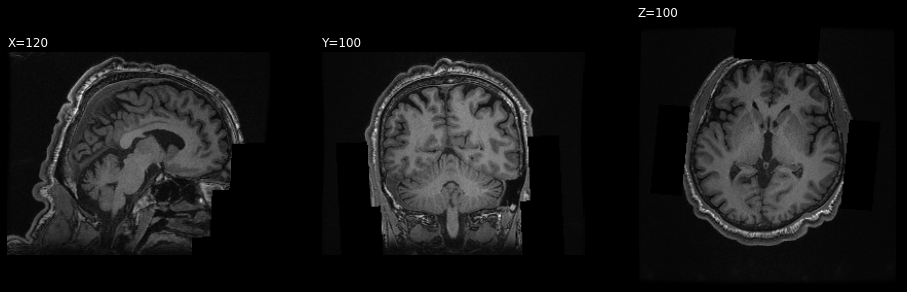

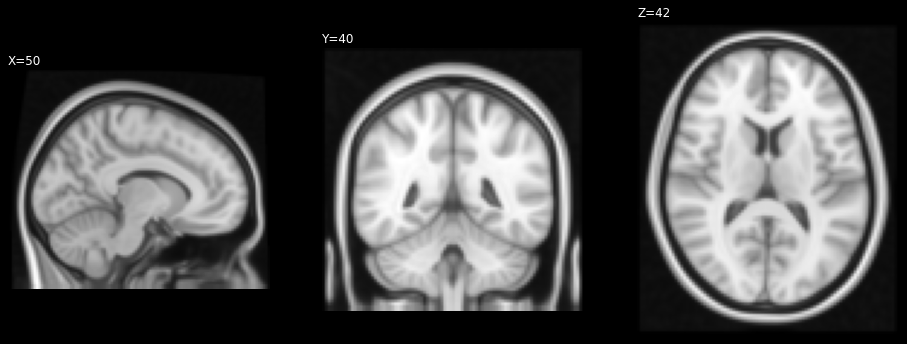

In [4]:
template = nib.load(data_path + '/MNI152_T1_2mm.nii.gz')
T1 = nib.load(data_path +  '/T1w.nii.gz')
temp_mask = nib.load( data_path + '/MNI152_T1_2mm_brain_mask.nii.gz')

plot_mp_mri(T1.get_fdata(),slice_num=[120,100,100])
plot_mp_mri(template.get_fdata(),slice_num=[50,40,42])

## Know we plot MNI152 template image with brain mask file then we do this with T1w image and template mask.
### as you can see T1w and Template brain mask are not aligned together so, we will register T1w image to tmplate image in next level.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


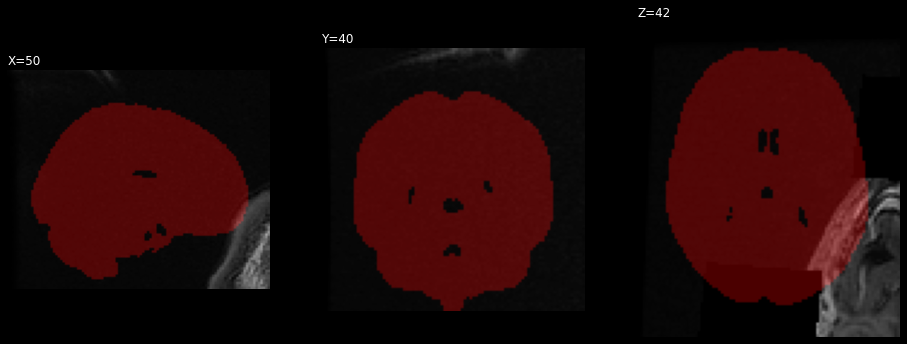

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


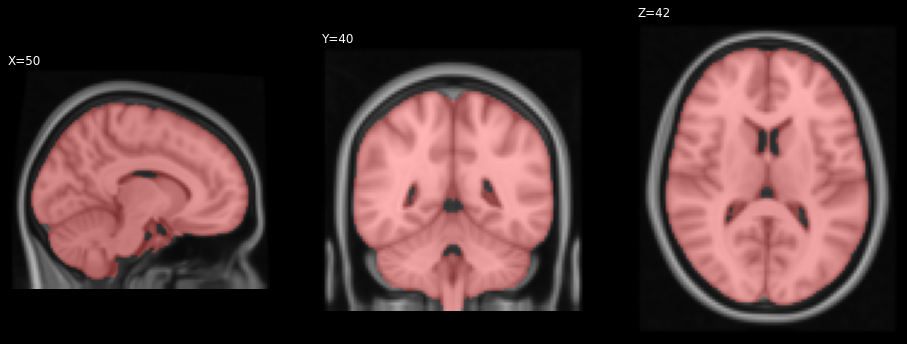

In [11]:
plot_mp_mri(T1.get_fdata(),temp_mask.get_fdata(),slice_num=[50,40,42])
plot_mp_mri(template.get_fdata(),temp_mask.get_fdata(),slice_num=[50,40,42])

### Register T1w image to MNI152 Template
 

In [12]:
!bash antsRegistrationSyNQuick.sh -d 3 -f MNI152_T1_2mm.nii.gz -m T1w.nii.gz -o T12std_ -n 10


--------------------------------------------------------------------------------------
 Mapping parameters
--------------------------------------------------------------------------------------
 ANTSPATH is /gdrive/MyDrive/ANTs/bin

 Dimensionality:           3
 Output name prefix:       T12std_
 Fixed images:             MNI152_T1_2mm.nii.gz
 Moving images:            T1w.nii.gz
 Mask images:              
 Initial transforms:       
 Number of threads:        10
 Spline distance:          26
 Transform type:           s
 MI histogram bins:        32
 Precision:                d
 Use histogram matching    0
 antsRegistration call:
--------------------------------------------------------------------------------------
/gdrive/MyDrive/ANTs/bin/antsRegistration --verbose 1 --dimensionality 3 --float 0 --collapse-output-transforms 1 --output [ T12std_,T12std_Warped.nii.gz,T12std_InverseWarped.nii.gz ] --interpolation Linear --use-histogram-matching 0 --winsorize-image-intensities [ 0.005,

## Plot registerd T1w imge together with our template brain mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


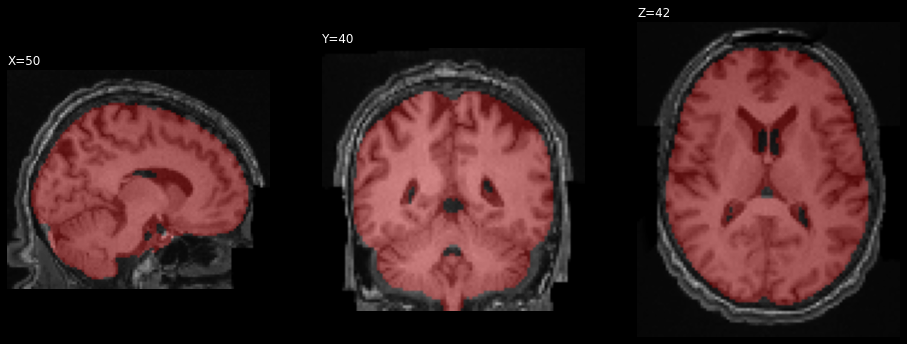

In [5]:
T1_registerd = nib.load(f'{data_path}/T12std_Warped.nii.gz')
plot_mp_mri(T1_registerd.get_fdata(),temp_mask.get_fdata(),slice_num=[50,40,42])

## Dummy skull-stripng !!!

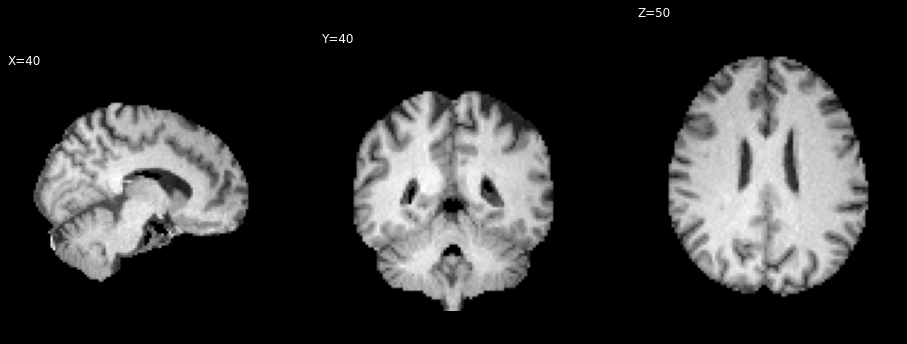

In [16]:
ss_t1 = temp_mask.get_fdata() * T1_registerd.get_fdata()
plot_mp_mri(ss_t1)

# Brain Extraction (Skull Striping) by ANTs function
* it takes ~ 1 hr to complete !!!
* right way for skull stripng :)

In [17]:
!bash antsBrainExtraction.sh -d 3 -a T12std_Warped.nii.gz -e T_template0.nii.gz -m T_template0_BrainCerebellumProbabilityMask.nii.gz -o T1_

 
Will run Atropos segmentation with K=3. Classes labeled in order of mean intensity. Assuming CSF=1, GM=2, WM=3


    Using antsBrainExtraction with the following arguments:
      image dimension         = 3
      anatomical image        = T12std_Warped.nii.gz
      extraction template     = T_template0.nii.gz
      extraction reg. mask    = 
      extraction prior        = T_template0_BrainCerebellumProbabilityMask.nii.gz
      output prefix           = T1_
      output image suffix     = nii.gz

    N4 parameters (pre brain extraction):
      convergence             = [ 50x50x50x50,0.0000001 ]
      shrink factor           = 4
      B-spline parameters     = [ 200 ]

    Atropos parameters (extraction):
       convergence            = [ 3,0.0 ]
       likelihood             = Gaussian
       initialization         = kmeans[ 3 ]
       mrf                    = [ 0.1,1x1x1 ]
       use clock random seed  = 1

---------------------  Running antsBrainExtraction.sh on 51839cd664ef  -----

# T1w extracted brain 

<Figure size 720x360 with 0 Axes>

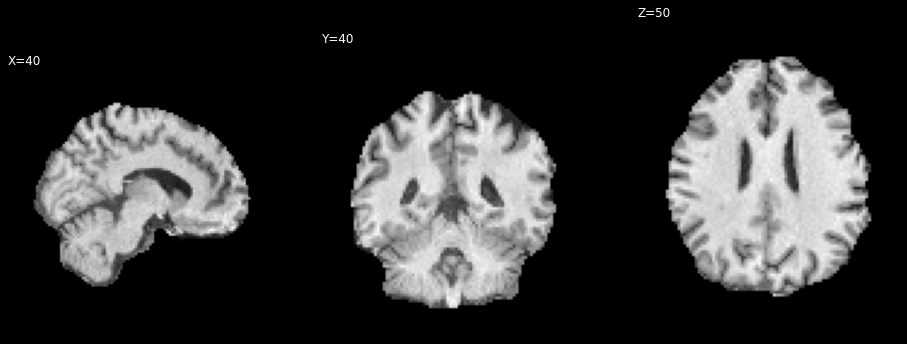

In [17]:
plt.figure(figsize = (10,5))
ss_brain = nib.load('/gdrive/MyDrive/mri/T1_BrainExtractionBrain.nii.gz')
plot_mp_mri(ss_brain.get_fdata())

## As you can see below we plot dummy brain extrcted image together with template mask, you can change the slice numbers and see how these two imges are aligned.

#First question

* we skiped one step from normalzation of T1w image to template image intentionally, based of above information,what do you think about droped step?, what that step is?
* Please write your answer in a new text section below this one.


یکی از مراحلی که در اینجا انجام نشده است مرحله اسموتینگ است
علت این امر این است که میدان مغناطیسی در همه جای دستگاه یکسان نیست و به همین علت سیگنال دریافتی علاوه بر فعالیت های مغز به مکان آن نیز بستگی دارد. برای رفع این مشکل می توان از اسموتینگ استفاده کرد ولی لزوما اضافه کردن این مرحله همیشه لازم نبوده و باید دید در تحلیل به چه چیزی احتیاج داریم.برای مثال اگر کلاستر هایی که میخواهیم بررسی کنیم کوچک باشند اسموتینگ اطلاعات را از بین می برد و بهتر است انجام نشود





Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


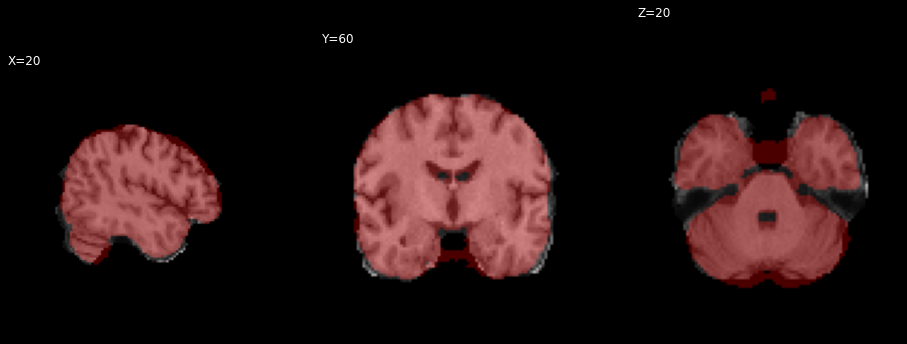

In [25]:
plot_mp_mri(ss_brain.get_fdata(),temp_mask.get_fdata(),[20,60,20])

# T1 image segmentation with [FastSurfer](https://github.com/Deep-MI/FastSurfer)

> Indented block



In [6]:
import os
import sys
from os.path import exists, join, basename, splitext

%cd /content
git_repo_url = 'https://github.com/deep-mi/fastsurfer.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q $git_repo_url
  sys.path.append(project_name)

# Go to the FastSurfer directory
%cd /content/fastsurfer/
!cp $data_path/T12std_Warped.nii.gz /content
img = '/content/T12std_Warped.nii.gz'

# Run the program
! ./run_fastsurfer.sh --t1 $img \
                      --sd /content/fastsurfer_seg \
                      --sid my_sub \
                      --seg_only --py python3

/content
/content/fastsurfer
Setting ENV variable FASTSURFER_HOME to current working directory /content/fastsurfer. 
Change via enviroment to location of your choice if this is undesired (export FASTSURFER_HOME=/dir/to/FastSurfer)
Fri Jun  3 10:55:43 UTC 2022

/content/fastsurfer/FastSurferCNN /content/fastsurfer
python3 eval.py --in_name /content/T12std_Warped.nii.gz --out_name /content/fastsurfer_seg/my_sub/mri/aparc.DKTatlas+aseg.deep.mgz --conformed_name /content/fastsurfer_seg/my_sub/mri/orig.mgz --order 1 --network_sagittal_path /content/fastsurfer/checkpoints/Sagittal_Weights_FastSurferCNN/ckpts/Epoch_30_training_state.pkl --network_axial_path /content/fastsurfer/checkpoints/Axial_Weights_FastSurferCNN/ckpts/Epoch_30_training_state.pkl --network_coronal_path /content/fastsurfer/checkpoints/Coronal_Weights_FastSurferCNN/ckpts/Epoch_30_training_state.pkl --batch_size 8 --simple_run --run_viewagg_on check
Reading volume /content/T12std_Warped.nii.gz
The input image is not conformed

### Convert outputs of FastSurfer from (freesurfer formate) .mgz to .nii.gz 

In [30]:
data = nib.load('/content/fastsurfer_seg/my_sub/mri/aparc.DKTatlas+aseg.deep.mgz')
img_nifti = nib.Nifti1Image(data.get_fdata(), data.affine, header=nib.Nifti1Header())
nib.nifti1.save(img_nifti, f'{data_path}/aparc.DKTatlas+aseg.deep.nii.gz')

data = nib.load('/content/fastsurfer_seg/my_sub/mri/orig.mgz')
img_nifti = nib.Nifti1Image(data.get_fdata(), data.affine, header=nib.Nifti1Header())
nib.nifti1.save(img_nifti, f'{data_path}/orig.nii.gz')

## register segmented image to MNI152 Template



In [31]:
%cd $data_path
!bash antsRegistrationSyNQuick.sh -d 3 -f MNI152_T1_2mm.nii.gz -m orig.nii.gz -o seg2std_ -n 10

/gdrive/MyDrive/mri

--------------------------------------------------------------------------------------
 Mapping parameters
--------------------------------------------------------------------------------------
 ANTSPATH is /gdrive/MyDrive/ANTs/bin

 Dimensionality:           3
 Output name prefix:       seg2std_
 Fixed images:             MNI152_T1_2mm.nii.gz
 Moving images:            orig.nii.gz
 Mask images:              
 Initial transforms:       
 Number of threads:        10
 Spline distance:          26
 Transform type:           s
 MI histogram bins:        32
 Precision:                d
 Use histogram matching    0
 antsRegistration call:
--------------------------------------------------------------------------------------
/gdrive/MyDrive/ANTs/bin/antsRegistration --verbose 1 --dimensionality 3 --float 0 --collapse-output-transforms 1 --output [ seg2std_,seg2std_Warped.nii.gz,seg2std_InverseWarped.nii.gz ] --interpolation Linear --use-histogram-matching 0 --winsorize-i

## Apply Tansfrom to label image 

In [32]:
!antsApplyTransforms -d 3 -i aparc.DKTatlas+aseg.deep.nii.gz -r MNI152_T1_2mm.nii.gz -n MultiLabel -t [seg2std_0GenericAffine.mat,0] -t seg2std_1Warp.nii.gz -o T1_segmented.nii.gz 

## plot segmentation result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


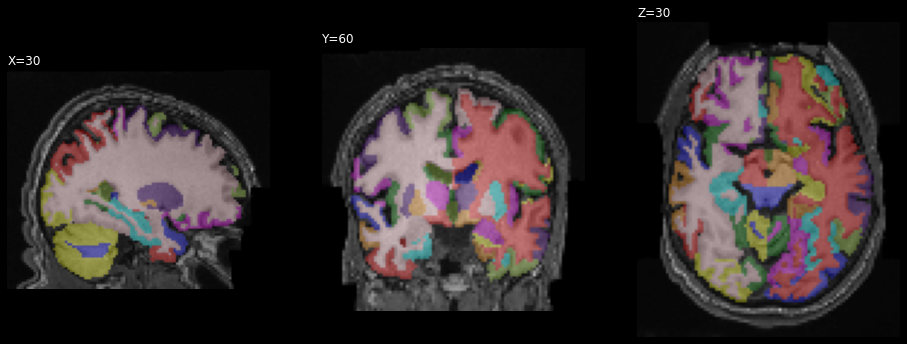

In [132]:
seg = nib.load('T1_segmented.nii.gz')
plot_mp_mri(mri = T1_registerd.get_fdata(), mask = seg.get_fdata(),slice_num=[30,60,30])

# Plot rest fMRI imgae

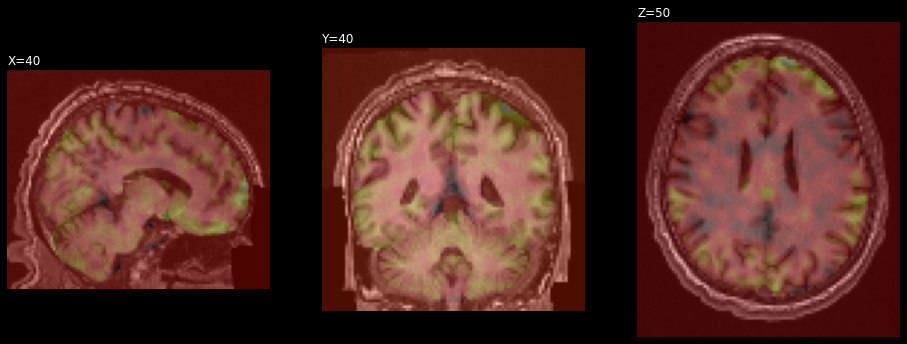

In [131]:
rest = nib.load('rest.nii.gz')
masked_rest = np.zeros((rest.shape[0],rest.shape[1],rest.shape[2],rest.shape[3]))
for i in range(rest.shape[3]):
  masked_rest[:,:,:,i] = rest.get_fdata()[:,:,:,i]*temp_mask.get_fdata()
plot_mp_mri(T1_registerd.get_fdata(),masked_rest,bold = True,time = 50,slice_num = [40,40,50])

## plot some voxles from left hippocampus.
##### to find left hippocampus label use *aparc+seg.txt* in requirement files

<function matplotlib.pyplot.show>

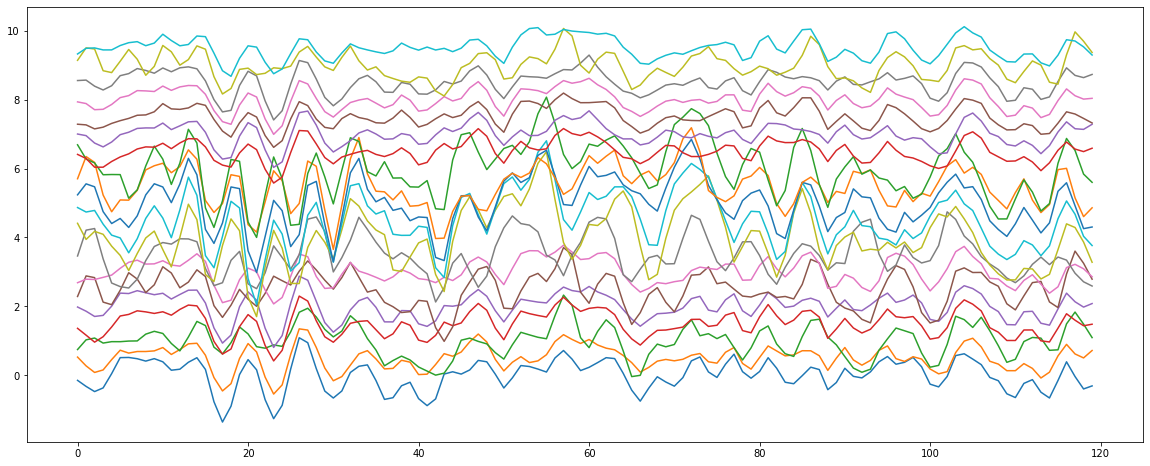

In [53]:
plt.figure(figsize = (20,8))
L_Hippocampus = 17

for voxel in range(20):
  plt.plot(range(120),rest.get_fdata()[seg.get_fdata() == 17][voxel]+ (.5 * voxel))

plt.show


# Seed-base correlation Analysis :

#### Seed-based Correlation Analysis (SCA) is one of the most common ways to explore functional connectivity within the brain. Based on the time series of a seed voxel (or ROI), connectivity is calculated as the correlation of time series for all other voxels in the brain. The result of SCA is a connectivity map showing Z-scores for each voxel indicating how well its time series correlates with the time series of the seed. Below is an example connectivity map showing correlated voxels based on a seed in the precuneus.






$$ r(x) = {\int{ S(x,t) R(t) dt } \over { \left( \int{ R^2(t) dt }\int{ S^2(x,t) dt }  \right)^{1/2} }} $$

\\
$$Z(x) = arctanh^{-1} ( r(x) ) $$

\\


* $S$ ➡ the BOLD timeseries at each voxel (for simplicity all timeseries are considered centered to zero mean).

* $R$ ➡ the average BOLD timeseries within an ROI

* $r$ ➡ the spatial map of Pearson correlation coefficients

* $x$ ➡ spatial location (voxels)

## File rest.nii.gz is mean resting state functional image for 1000 subjects.
## use this file and seed mask files to ask below questions.

* for each seed mask file, find the volume of seed region.
* for each seed mask file, find percentage of overlap between segmented labels(*aparc+seg.txt*) and seed region.
* Calculate SCA for each seed mask, transform raw r-values to Z-fisher and then find volexs with z-value more than 0.999 and less than 0.001 percentile values (significant voxels).
* for each seed mask, find percentage of SCA significant voxels of each region in segmented file.
* plot inter-section between all 5 seed region SC network in a $5 \times 5$ matrix based on number of overlaped voxels



* Don't forget "**Do the all calculations just inside Brain mask**"

## volume of seed region

In [133]:
%cd $data_path
seeds = ['seed1.nii','seed2.nii','seed3.nii','seed4.nii','seed5.nii']
for s in seeds:
  seed = nib.load(s).get_fdata()
  volumn = seed.sum()
  print(s[:-4],":",volumn)

/gdrive/MyDrive/mri
seed1 : 9782.0
seed2 : 2212.0
seed3 : 171.0
seed4 : 4702.0
seed5 : 8376.0


## percentage of overlap between segmented labels

In [134]:
seg_dict = {}
with open("aparc+seg.txt") as file_in:
  lines = [line.rstrip() for line in file_in]
for i in range(0,len(lines),2):
  seg_dict[lines[i]] = int(lines[i+1])

seg_voxel_count = {}
for key,value in seg_dict.items():
  seg_voxel_count[key] = np.count_nonzero(seg.get_fdata() == value)

In [135]:
for s in seeds:
  seed = nib.load(s).get_fdata()
  print(s[:-4])
  for key,value in seg_dict.items():
    seed_count = seed[seg.get_fdata()==value].sum()
    if(seed_count != 0):
      print("     ",key,":",seed_count/seg_voxel_count[key])

seed1
      NO-LABEL : 0.0011124019034110275
      LEFT-CEREBRAL-WHITE-MATTER : 0.000553466801534439
      RIGHT-CEREBRAL-WHITE-MATTER : 0.11976788242566853
      RIGHT-LATERAL-VENTRICLE : 0.027698863636363636
      RIGHT-CAUDATE : 0.1391465677179963
      RIGHT-PUTAMEN : 0.029345372460496615
      RIGHT-ACCUMBENS-AREA : 0.2268041237113402
      WM-HYPOINTENSITIES : 0.016483516483516484
      CTX-LH-MEDIALORBITOFRONTAL : 0.10271041369472182
      CTX-LH-ROSTRALANTERIORCINGULATE : 0.019455252918287938
      CTX-RH-ENTORHINAL : 0.07803468208092486
      CTX-RH-INFERIORTEMPORAL : 0.05048543689320388
      CTX-RH-LATERALORBITOFRONTAL : 0.5434491978609626
      CTX-RH-MEDIALORBITOFRONTAL : 0.5489566613162119
      CTX-RH-MIDDLETEMPORAL : 0.010137149672033392
      CTX-RH-PARSORBITALIS : 0.2948717948717949
      CTX-RH-PARSTRIANGULARIS : 0.034013605442176874
      CTX-RH-ROSTRALANTERIORCINGULATE : 0.3970893970893971
      CTX-RH-ROSTRALMIDDLEFRONTAL : 0.11579699785561115
      CTX-RH-SUPERIO

## SCA

In [144]:
from tqdm import tqdm
import math
rest = nib.load('rest.nii.gz').get_fdata()
seeds = ['seed1.nii','seed2.nii','seed3.nii','seed4.nii','seed5.nii']
for s in seeds:
  seed = nib.load(s).get_fdata()
  seed_timeseries = np.zeros(rest.shape[3])
  seed_data = np.zeros((rest.shape[0],rest.shape[1],rest.shape[2]))
  for i in range(rest.shape[3]):
    seed_data[:,:,:] = rest[:,:,:,i]*seed
    seed_timeseries[i] = seed_data.sum()/seed.sum()
  SCA_matrix = np.zeros((rest.shape[0],rest.shape[1],rest.shape[2]))
  for x in tqdm(range(rest.shape[0])):
    for y in range(rest.shape[1]):
      for z in range(rest.shape[2]):
        voxel_timeseries = rest[x,y,z,:]
        if(len(voxel_timeseries[voxel_timeseries==0])==rest.shape[3]):
          z_score = 0
        else:
          z_score = math.atan(np.corrcoef(seed_timeseries,rest[x,y,z,:])[0,1])
        if(not math.isnan(z_score)):
          SCA_matrix[x,y,z] = z_score
  where_0 = np.where(seed == 0)
  where_1 = np.where(seed == 1)
  seed[where_0] = 1
  seed[where_1] = 0
  SCA_matrix = SCA_matrix * seed
  print("saving "+s[:-4]+" ...\n")
  img_nifti = nib.Nifti1Image(SCA_matrix, affine=np.eye(4), header=nib.Nifti1Header())
  nib.nifti1.save(img_nifti, data_path+"/SCA_"+s)

100%|██████████| 91/91 [00:31<00:00,  2.92it/s]


saving seed1 ...



100%|██████████| 91/91 [00:29<00:00,  3.07it/s]


saving seed2 ...



100%|██████████| 91/91 [00:29<00:00,  3.09it/s]


saving seed3 ...



100%|██████████| 91/91 [00:29<00:00,  3.08it/s]


saving seed4 ...



100%|██████████| 91/91 [00:29<00:00,  3.08it/s]


saving seed5 ...



In [145]:
SCAs = ['SCA_seed1.nii','SCA_seed2.nii','SCA_seed3.nii','SCA_seed4.nii','SCA_seed5.nii']
for s in SCAs:
  sca_seed = nib.load(s).get_fdata()
  sig_seed = np.zeros((sca_seed.shape[0],sca_seed.shape[1],sca_seed.shape[2]))
  upper = np.percentile(sca_seed,99.9)
  lower = np.percentile(sca_seed, 0.1)
  for x in tqdm(range(sca_seed.shape[0])):
    for y in range(sca_seed.shape[1]):
      for z in range(sca_seed.shape[2]):
        corr = sca_seed[x,y,z]
        if((corr >= upper) or (corr <= lower)):
          sig_seed[x,y,z] = 1
  print("saving sig_"+s[4:-4]+" ...\n")
  img_nifti = nib.Nifti1Image(sig_seed, affine=np.eye(4), header=nib.Nifti1Header())
  nib.nifti1.save(img_nifti, data_path+"/sig_"+s[4:])

100%|██████████| 91/91 [00:00<00:00, 127.14it/s]


saving sig_seed1 ...



100%|██████████| 91/91 [00:00<00:00, 125.07it/s]


saving sig_seed2 ...



100%|██████████| 91/91 [00:00<00:00, 125.34it/s]


saving sig_seed3 ...



100%|██████████| 91/91 [00:00<00:00, 125.70it/s]


saving sig_seed4 ...



100%|██████████| 91/91 [00:00<00:00, 125.48it/s]

saving sig_seed5 ...



## percentage of SCA significant voxels

In [146]:
sig_seeds = ['sig_seed1.nii','sig_seed2.nii','sig_seed3.nii','sig_seed4.nii','sig_seed5.nii']
for s in sig_seeds:
  seed = nib.load(s).get_fdata()
  print(s[:-4])
  for key,value in seg_dict.items():
    seed_count = seed[seg.get_fdata()==value].sum()
    if(seed_count != 0):
      print("     ",key,":",seed_count/seg_voxel_count[key])

sig_seed1
      NO-LABEL : 0.0006323431941163076
      LEFT-CEREBRAL-WHITE-MATTER : 0.010420443918544955
      LEFT-LATERAL-VENTRICLE : 0.02857142857142857
      LEFT-CAUDATE : 0.001968503937007874
      LEFT-PUTAMEN : 0.009259259259259259
      LEFT-ACCUMBENS-AREA : 0.1134020618556701
      RIGHT-CEREBRAL-WHITE-MATTER : 0.0031108540889784033
      RIGHT-LATERAL-VENTRICLE : 0.05823863636363636
      RIGHT-PUTAMEN : 0.0056433408577878106
      RIGHT-ACCUMBENS-AREA : 0.07216494845360824
      CTX-LH-INFERIORTEMPORAL : 0.0018206645425580337
      CTX-LH-LATERALORBITOFRONTAL : 0.033647375504710635
      CTX-LH-MEDIALORBITOFRONTAL : 0.24251069900142652
      CTX-LH-MIDDLETEMPORAL : 0.0015321756894790602
      CTX-LH-PARSORBITALIS : 0.06796116504854369
      CTX-LH-POSTCENTRAL : 0.0014716703458425313
      CTX-LH-ROSTRALANTERIORCINGULATE : 0.10765239948119326
      CTX-LH-ROSTRALMIDDLEFRONTAL : 0.01249024199843872
      CTX-LH-SUPERIORFRONTAL : 0.003705075954057058
      CTX-LH-SUPERIORTEMPO

## inter-section between all 5 seed region SC network

[[1806.   14.   42.    5.  870.]
 [  14. 1806.    5.  613.   13.]
 [  42.    5. 1806.    0.   35.]
 [   5.  613.    0. 1806.   29.]
 [ 870.   13.   35.   29. 1806.]]


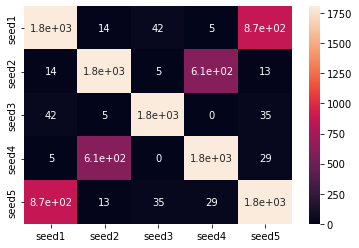

In [147]:
import seaborn as sns
intersect = np.zeros((5,5))
sig_seeds = ['sig_seed1.nii','sig_seed2.nii','sig_seed3.nii','sig_seed4.nii','sig_seed5.nii']
for i in range(5):
  seed1 = nib.load(sig_seeds[i]).get_fdata()
  for j in range(5):
    seed2 = nib.load(sig_seeds[j]).get_fdata()
    intersect[i,j] = seed1[seed2 == 1].sum()
print(intersect)
labels = ['seed1','seed2','seed3','seed4','seed5']
sns.heatmap(intersect,xticklabels=labels,yticklabels=labels,annot=True)